
<p class="text-success"><b>2.</b> - Visit the AI Exploratorium at cs.ualberta.ca/~aixplore. Click the Decision Tree link. Read the narrative on basketball game statistics. Examine the data, and then build a decision tree. Report your impressions of the accuracy of this decision tree. Also, explore the effects of different algorithms.
</p>

1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

2. Loading dataframe

In [2]:
df=pd.read_csv("Basketball.csv")

3. The Data

In [3]:
df

,Won,Home,7pm,Yes,Center,Forward,Tall,Unnamed: 7
0,Won,Home,7pm,Yes,Forward,Center,Short,
1,Won,Away,7pm,Yes,Forward,Forward,Tall,NaN
2,Lost,Home,5pm,No,Forward,Center,Tall,NaN
3,Lost,Away,9pm,Yes,Forward,Forward,Short,
4,Won,Away,7pm,No,Center,Forward,Tall,NaN
5,Lost,Home,7pm,No,Forward,Center,Tall,NaN
6,Won,Home,7pm,Yes,Center,Center,Tall,NaN
7,Won,Away,7pm,Yes,Center,Center,Short,
8,Lost,Home,9pm,No,Forward,Center,Short,
9,Lost,Away,7pm,No,Forward,Forward,Short,


4. Droping trivail columns & setting column names

In [4]:
df.drop("Unnamed: 7",axis=1,inplace=True)
df.columns=["Outcome","Where","When","Fred Starts","JoeOffence","JoeDefense","OppCenter"]

In [5]:
df

,Outcome,Where,When,Fred Starts,JoeOffence,JoeDefense,OppCenter
0,Won,Home,7pm,Yes,Forward,Center,Short
1,Won,Away,7pm,Yes,Forward,Forward,Tall
2,Lost,Home,5pm,No,Forward,Center,Tall
3,Lost,Away,9pm,Yes,Forward,Forward,Short
4,Won,Away,7pm,No,Center,Forward,Tall
5,Lost,Home,7pm,No,Forward,Center,Tall
6,Won,Home,7pm,Yes,Center,Center,Tall
7,Won,Away,7pm,Yes,Center,Center,Short
8,Lost,Home,9pm,No,Forward,Center,Short
9,Lost,Away,7pm,No,Forward,Forward,Short


5. Binary encoding of some categorical variables. As descision tree works efficiently with categorical variables.

In [6]:
# This fuction takes data frame, column name, & categorical values as input to encode them.
def binary_encoder(df,col_name,val_1,val_0):
    bina=[]
    for x in df[col_name]:
        if x==val_1:
            bina.append(1)
        elif x==val_0:
            bina.append(0)
    df[col_name]=bina        

In [7]:
#encoding Won feature with Won=1 & Lost=0
binary_encoder(df,"Outcome","Won","Lost")

In [8]:
one_hot_data = pd.get_dummies(df[['Outcome', 'Where', 'When', 'Fred Starts', 'JoeOffence', 'JoeDefense','OppCenter']],drop_first=True)
one_hot_data.head()

,Outcome,Where_Home,When_7pm,When_9pm,Fred Starts_Yes,JoeOffence_Forward,JoeDefense_Forward,OppCenter_Tall
0,1,1,1,0,1,1,0,0
1,1,0,1,0,1,1,1,1
2,0,1,0,0,0,1,0,1
3,0,0,0,1,1,1,1,0
4,1,0,1,0,0,0,1,1


In [9]:
one_hot_data.columns

Index(['Outcome', 'Where_Home', 'When_7pm', 'When_9pm', 'Fred Starts_Yes',
       'JoeOffence_Forward', 'JoeDefense_Forward', 'OppCenter_Tall'],
      dtype='object')

======================================================================================================================================== Why get_dummies instead of label_encoder  ================================================================================================================================

Here we considered the "When" as three classes 7, 5 and 9 pm. If we have to consider these in the order then only the label encoder comes into play, other ways we can stick with the get dummies. If we have to consider the order in the time then the etire problem should be consider in time series. If avoiding the autocorrelation we used get dummies, that is these as each classes. 

In [10]:
# Holding the results in a list
scores_accuracy = []

5. Doing train test split such on the data

In [11]:
X = one_hot_data[['Where_Home', 'When_7pm', 'When_9pm', 'Fred Starts_Yes',
       'JoeOffence_Forward', 'JoeDefense_Forward', 'OppCenter_Tall']]
y = one_hot_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier()

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 7), (7, 7), (12,), (7,))

In [55]:
X_train.sum()

Where_Home            6
When_7pm              7
When_9pm              2
Fred Starts_Yes       6
JoeOffence_Forward    3
JoeDefense_Forward    7
OppCenter_Tall        6
dtype: int64

6. Modelling Decision Tree

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

7. Predicting using test data

In [14]:
y_pred=clf.predict(X_test)

8. Confsion Matrix

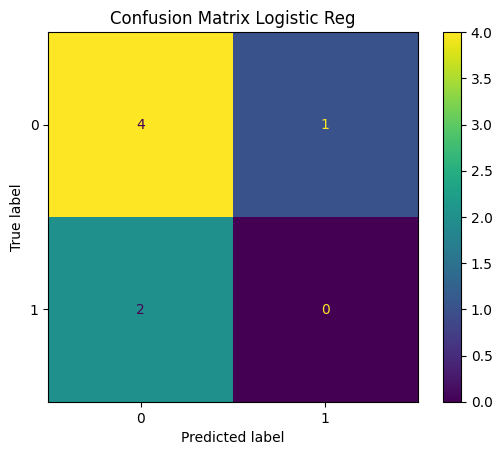

In [15]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.title("Confusion Matrix Logistic Reg")
plt.show()

From the confusion matrix we can see that, from the test data, zero observation are predicted false if it is actually false. Four observations are predicted true when they are true. One observation is predicted 1 when it was 0 and two observations predicted 0 when it was 1 in real.

9. ROC curve

Text(0.5, 1.0, 'ROC Curve')

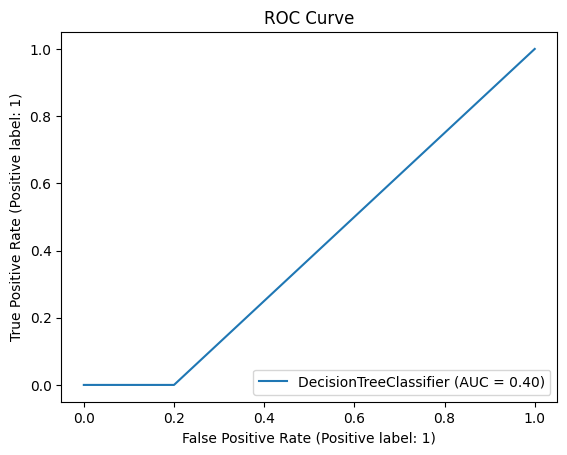

In [16]:
from sklearn import metrics, model_selection
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.title("ROC Curve")

10. Accuracy Score

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5714285714285714

In [18]:
# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_score = dt.score(X_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(X_test,y_test))


print accuracy of decision tree algo:  0.5714285714285714


11. Classification report

In [19]:
from sklearn.metrics import classification_report
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.33      0.40      0.36         7
weighted avg       0.48      0.57      0.52         7



[Text(0.6666666666666666, 0.9, 'X[4] <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5, 0.7, 'X[1] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.5, 'X[6] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.3, 'X[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

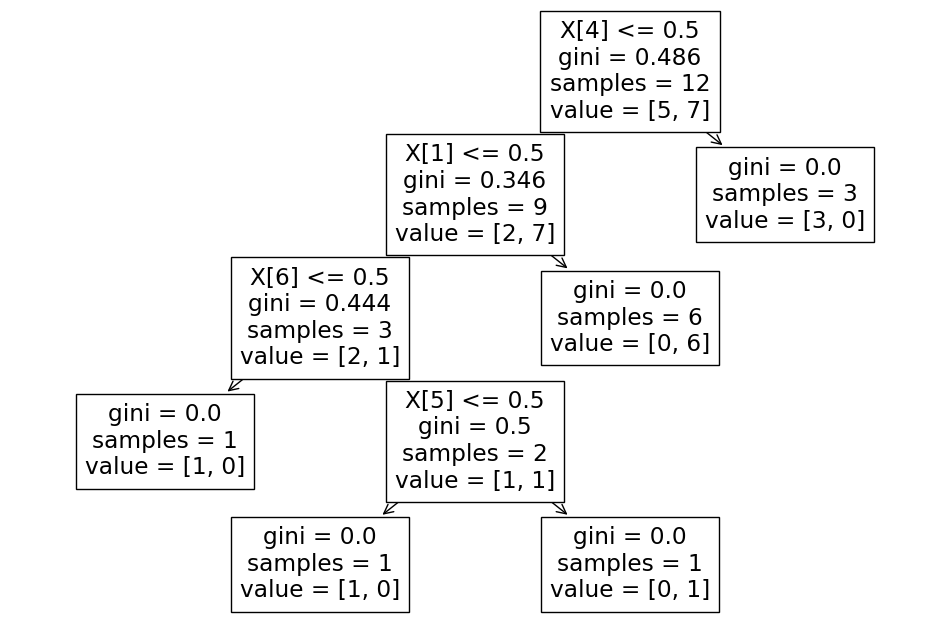

In [52]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt.fit(X_train, y_train))

# Decision tree impression

The decision tree results using this basketball data is not accurate enough to predict well. So it is better to opt other algorithms with this data. 

# Model Comparison

In [20]:
# Logistic regression classication
# LR with sklearn

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test,y_test)))

test accuracy 0.7142857142857143


In [21]:
# KNN  classification
# Knn with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

knn_score = knn.score(X_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test,y_test)))

 9 nn score: 0.5714285714285714 


In [22]:
# SVM Classification
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train,y_train)

svm_score = svm.score(X_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test,y_test))

accuracy of svm algo:  0.8571428571428571


In [23]:
# Randon Forest Classification
#Random Forest With Sklearn

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(X_train,y_train)

rf_score = rf.score(X_test,y_test)
scores_accuracy.append(["RF",rf_score])

print("random forest result: ", rf.score(X_test,y_test))

random forest result:  0.8571428571428571


In [24]:
scores_accuracy

[['DT', 0.5714285714285714],
 ['LR', 0.7142857142857143],
 ['KNN', 0.5714285714285714],
 ['SVM', 0.8571428571428571],
 ['RF', 0.8571428571428571]]

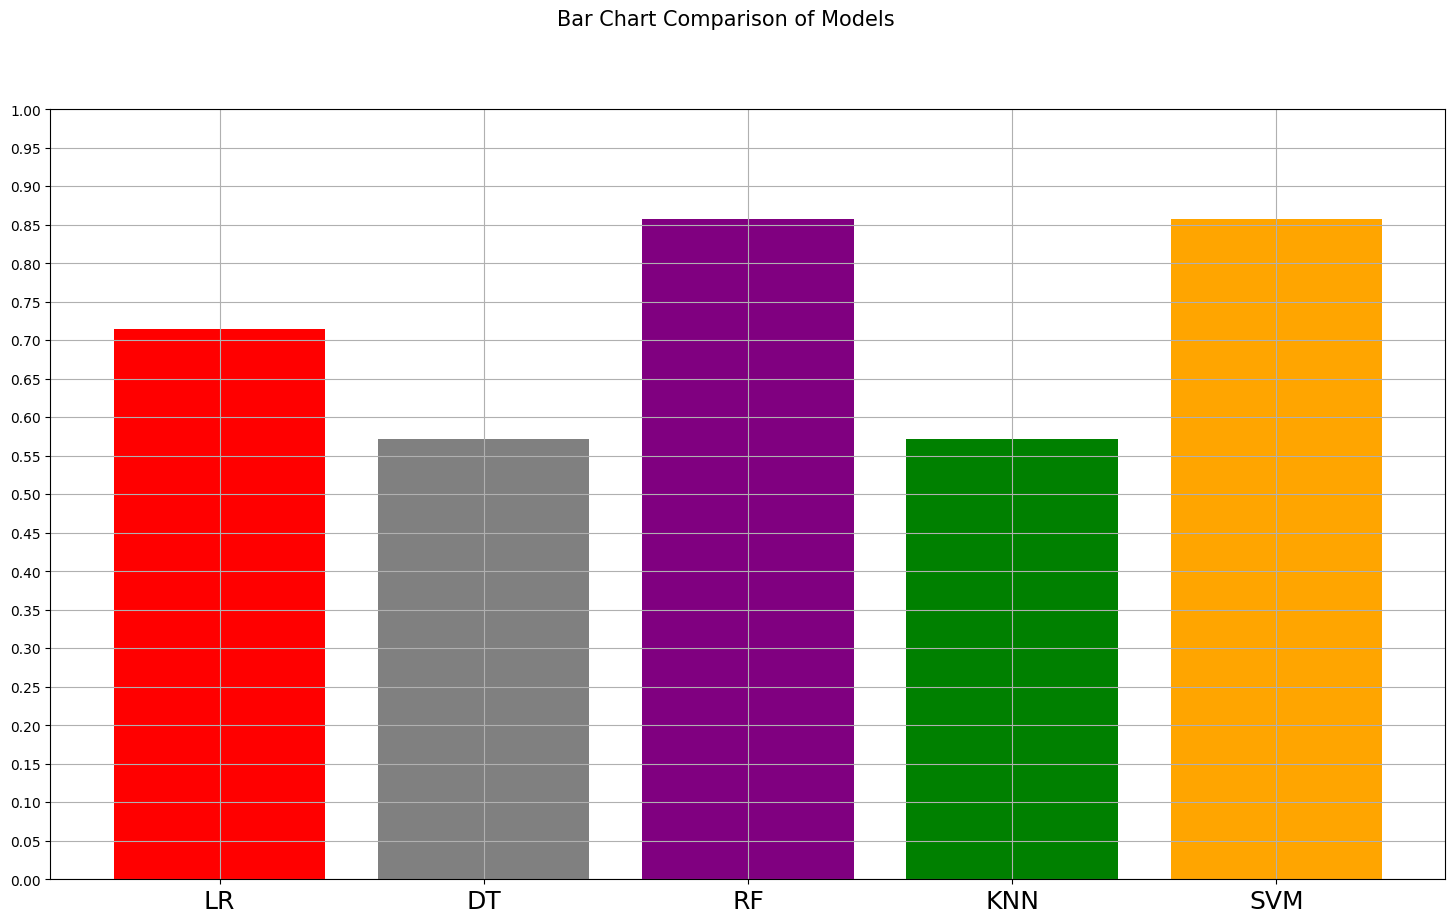

In [25]:
algorithms=("LR","DT","RF","KNN","SVM")
scores = (lr_score,dt_score,rf_score,knn_score, svm_score)
y_pos = np.arange(1,6)
colors = ("red","gray","purple","green","orange")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

# Conclusion

From the above graph it is clear that, decision tree and KNN performs least among the rest of models. At the same Random forest and SVM performs better than the other model we have tried. 